# Part I: Data Preparation

## Read data from csv

In [122]:
import pandas as pd
import numpy as np

DATA_DIR = 'C:\\Users\\Elham\\datasets\\noshowappointments'
CSV_FILE = DATA_DIR + '\\'+ 'KaggleV2-May-2016.csv'

appt_df=pd.read_csv(CSV_FILE)



In [123]:
appt_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [124]:
appt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [125]:
appt_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [126]:
# do data cleanup here
# highly recommend that you rename dataset
# e.g., if you used appt_df = pd.read_csv(...) above
# first thing to do here is clean_appt_df = appt_df
clean_appt_df=appt_df
clean_appt_df.rename(columns = {'AppointmentID':'AppointmentId','Hipertension': 'Hypertension','Handcap': 'Handicap','No-show': 'No_Show'}, inplace = True)

In [127]:

print('Gender:',clean_appt_df.Gender.unique())
Sorted_Schedule=sorted(clean_appt_df.ScheduledDay.unique())
print('ScheduledDay:',Sorted_Schedule[0],Sorted_Schedule[-1])
Sorted_App_Day=sorted(clean_appt_df.AppointmentDay.unique())
print('AppointmentDay:',Sorted_App_Day[0],Sorted_App_Day[-1])
print('Age:',sorted(clean_appt_df.Age.unique()))
print('Neighbourhood:',clean_appt_df.Neighbourhood.unique())
print('Scholarship:',clean_appt_df.Scholarship.unique())
print('Hypertension:',clean_appt_df.Hypertension.unique())
print('Diabetes:',clean_appt_df.Diabetes.unique())
print('Alcoholism:',clean_appt_df.Alcoholism.unique())
print('Handicap:',clean_appt_df.Handicap.unique())
print('SMS_received:',clean_appt_df.SMS_received.unique())
print('No_Show:',clean_appt_df.No_Show.unique())


Gender: ['F' 'M']
ScheduledDay: 2015-11-10T07:13:56Z 2016-06-08T20:07:23Z
AppointmentDay: 2016-04-29T00:00:00Z 2016-06-08T00:00:00Z
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRI

In [128]:
clean_appt_df=clean_appt_df[(clean_appt_df.Age >= 0) & (clean_appt_df.Age <= 100)]
clean_appt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110519 non-null float64
AppointmentId     110519 non-null int64
Gender            110519 non-null object
ScheduledDay      110519 non-null object
AppointmentDay    110519 non-null object
Age               110519 non-null int64
Neighbourhood     110519 non-null object
Scholarship       110519 non-null int64
Hypertension      110519 non-null int64
Diabetes          110519 non-null int64
Alcoholism        110519 non-null int64
Handicap          110519 non-null int64
SMS_received      110519 non-null int64
No_Show           110519 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [130]:
clean_appt_df['ScheduledDay']=pd.to_datetime(clean_appt_df['ScheduledDay'])
clean_appt_df['AppointmentDay']=pd.to_datetime(clean_appt_df['AppointmentDay'])
clean_appt_df


C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [134]:
clean_appt_df['sex'] = [0 if i == 'F' else 1 for i in clean_appt_df['Gender']]
clean_appt_df['Show_Status'] = [0 if i == 'No' else 1 for i in clean_appt_df['No_Show']]
clean_appt_df['Waiting_Time']= (clean_appt_df['AppointmentDay']-pd.to_datetime(clean_appt_df['ScheduledDay'].dt.date)).dt.days
clean_appt_df['area'] = pd.factorize(clean_appt_df['Neighbourhood'])[0]
clean_appt_df['weekday'] = clean_appt_df['AppointmentDay'].dt.weekday

clean_appt_df

C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,sex,Show_Status,Waiting_Time,area,weekday
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,0,0,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,0,0,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,0,1,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,0,2,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,0,0,4
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,0,0,2,3,4
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,0,1,2,4,4
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,0,1,2,4,4
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,0,0,0,5,4
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,0,0,2,6,4


In [135]:
sorted(clean_appt_df['Waiting_Time'].unique())

[-6,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 115,
 117,
 119,
 122,
 123,
 125,
 126,
 127,
 132,
 133,
 139,
 142,
 146,
 151,
 155,
 162,
 169,
 176,
 179]

In [136]:
clean_appt_df=clean_appt_df[clean_appt_df.Waiting_Time>=0]



In [137]:
clean_appt_df['Waiting_Time_Cat'] = clean_appt_df['Waiting_Time'].astype(int).map(lambda x: 4 if x > 30 else 3 if x>7 else 2 if x>=1 else 1 )

clean_appt_df['Age_Cat'] = pd.qcut(clean_appt_df['Age'], 6, labels=False)

clean_appt_df

C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Handicap,SMS_received,No_Show,sex,Show_Status,Waiting_Time,area,weekday,Waiting_Time_Cat,Age_Cat
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,0,No,0,0,0,0,4,1,5
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,0,No,1,0,0,0,4,1,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,0,No,0,0,0,1,4,1,5
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,0,No,0,0,0,2,4,1,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,0,No,0,0,0,0,4,1,4
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,...,0,0,No,0,0,2,3,4,2,5
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,...,0,0,Yes,0,1,2,4,4,2,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,...,0,0,Yes,0,1,2,4,4,2,3
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,...,0,0,No,0,0,0,5,4,1,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,...,0,0,No,0,0,2,6,4,2,1


In [138]:
clean_appt_df['Waiting_Time_Cat'].unique()

array([1, 2, 3, 4], dtype=int64)

In [139]:
pd.qcut(clean_appt_df['Age'], 6)

0          (61.0, 100.0]
1           (50.0, 61.0]
2          (61.0, 100.0]
3         (-0.001, 10.0]
4           (50.0, 61.0]
5          (61.0, 100.0]
6           (10.0, 24.0]
7           (37.0, 50.0]
8           (10.0, 24.0]
9           (10.0, 24.0]
10          (24.0, 37.0]
11          (24.0, 37.0]
12          (10.0, 24.0]
13          (24.0, 37.0]
14          (50.0, 61.0]
15          (10.0, 24.0]
16          (37.0, 50.0]
17          (37.0, 50.0]
18          (24.0, 37.0]
19          (37.0, 50.0]
20          (24.0, 37.0]
21        (-0.001, 10.0]
22          (10.0, 24.0]
23          (37.0, 50.0]
24         (61.0, 100.0]
25          (37.0, 50.0]
26          (37.0, 50.0]
27        (-0.001, 10.0]
28          (50.0, 61.0]
29          (24.0, 37.0]
               ...      
110497     (61.0, 100.0]
110498      (50.0, 61.0]
110499     (61.0, 100.0]
110500      (50.0, 61.0]
110501      (37.0, 50.0]
110502      (10.0, 24.0]
110503     (61.0, 100.0]
110504    (-0.001, 10.0]
110505      (50.0, 61.0]


In [140]:
clean_appt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110514 entries, 0 to 110526
Data columns (total 21 columns):
PatientId           110514 non-null float64
AppointmentId       110514 non-null int64
Gender              110514 non-null object
ScheduledDay        110514 non-null datetime64[ns]
AppointmentDay      110514 non-null datetime64[ns]
Age                 110514 non-null int64
Neighbourhood       110514 non-null object
Scholarship         110514 non-null int64
Hypertension        110514 non-null int64
Diabetes            110514 non-null int64
Alcoholism          110514 non-null int64
Handicap            110514 non-null int64
SMS_received        110514 non-null int64
No_Show             110514 non-null object
sex                 110514 non-null int64
Show_Status         110514 non-null int64
Waiting_Time        110514 non-null int64
area                110514 non-null int64
weekday             110514 non-null int64
Waiting_Time_Cat    110514 non-null int64
Age_Cat             110514

## Test set creation

- Create a test set of 100k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [141]:
import os
PROCESSED_DATA_DIR = 'Processed_Data'
Train_FILE = PROCESSED_DATA_DIR + '/'+ 'Train_Set.csv'
Test_FILE = PROCESSED_DATA_DIR + '/'+ 'Test_Set.csv'

# create test set with stratified sampling here
# refer to the intro notebook posted in class calendar for example

if not os.path.isdir(PROCESSED_DATA_DIR):
      os.makedirs(PROCESSED_DATA_DIR)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=20000./len(clean_appt_df), random_state=1234)
for train_index, test_index in split.split(clean_appt_df, clean_appt_df["Show_Status"]):
    train_set = clean_appt_df.loc[train_index]
    test_set = clean_appt_df.loc[test_index]
    
train_set.to_csv(Train_FILE) 
test_set.to_csv(Test_FILE) 
    

In [142]:
print('Gender:',train_set.Gender.unique())
Sorted_Schedule=sorted(train_set.ScheduledDay.unique())
print('ScheduledDay:',Sorted_Schedule[0],Sorted_Schedule[-1])
Sorted_App_Day=sorted(train_set.AppointmentDay.unique())
print('AppointmentDay:',Sorted_App_Day[0],Sorted_App_Day[-1])
print('Age:',sorted(train_set.Age.unique()))
print('Neighbourhood:',train_set.Neighbourhood.unique())
print('Scholarship:',train_set.Scholarship.unique())
print('Hypertension:',train_set.Hypertension.unique())
print('Diabetes:',train_set.Diabetes.unique())
print('Alcoholism:',train_set.Alcoholism.unique())
print('Handicap:',train_set.Handicap.unique())
print('SMS_received:',train_set.SMS_received.unique())
print('No_Show:',train_set.No_Show.unique())
print('Waiting_Time:',sorted(train_set.Waiting_Time.unique()))
print('Waiting_Time_Cat:',sorted(train_set.Waiting_Time_Cat.unique()))
print('Age_Cat:',sorted(train_set.Age_Cat.unique()))


Gender: ['M' 'F' nan]
ScheduledDay: NaT 2016-06-08T20:07:23.000000000
AppointmentDay: NaT 2016-06-08T00:00:00.000000000
Age: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 98.0, 99.0, 100.0, nan, 97.0]
Neighbourhood: ['SANTA MARTHA' 'MARUÍPE' 'RESISTÊNCIA' 'DA PENHA' 'JARDIM CAMBURI'
 'ITARARÉ' 'JARDIM DA PENHA' 'SANTOS REIS' 'BONFIM' 'SÃO JOSÉ' 'ROMÃO'
 'GRANDE VITÓRIA' 'SANTOS DUMONT' 'MARIA ORTIZ' 'SÃO CRISTÓVÃO' 'FRADINHOS'
 'DO MOSCOSO' 'ANDORINHAS' 'ILHA DE SANTA 

C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In the future, 'NAT < x' and 'x < NAT' will always be False.
  
C:\Users\Elham\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In the future, 'NAT < x' and 'x < NAT' will always be False.
  after removing the cwd from sys.path.


In [143]:
train_set.dropna(subset=train_set.columns, inplace=True)


In [144]:
print('Gender:',train_set.Gender.unique())
Sorted_Schedule=sorted(train_set.ScheduledDay.unique())
print('ScheduledDay:',Sorted_Schedule[0],Sorted_Schedule[-1])
Sorted_App_Day=sorted(train_set.AppointmentDay.unique())
print('AppointmentDay:',Sorted_App_Day[0],Sorted_App_Day[-1])
print('Age:',sorted(train_set.Age.unique()))
print('Neighbourhood:',train_set.Neighbourhood.unique())
print('Scholarship:',train_set.Scholarship.unique())
print('Hypertension:',train_set.Hypertension.unique())
print('Diabetes:',train_set.Diabetes.unique())
print('Alcoholism:',train_set.Alcoholism.unique())
print('Handicap:',train_set.Handicap.unique())
print('SMS_received:',train_set.SMS_received.unique())
print('No_Show:',train_set.No_Show.unique())
print('Waiting_Time:',sorted(train_set.Waiting_Time.unique()))
print('Waiting_Time_Cat:',sorted(train_set.Waiting_Time_Cat.unique()))
print('Age_Cat:',sorted(train_set.Age_Cat.unique()))


Gender: ['M' 'F']
ScheduledDay: 2015-11-10T07:13:56.000000000 2016-06-08T20:07:23.000000000
AppointmentDay: 2016-04-29T00:00:00.000000000 2016-06-08T00:00:00.000000000
Age: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]
Neighbourhood: ['SANTA MARTHA' 'MARUÍPE' 'RESISTÊNCIA' 'DA PENHA' 'JARDIM CAMBURI'
 'ITARARÉ' 'JARDIM DA PENHA' 'SANTOS REIS' 'BONFIM' 'SÃO JOSÉ' 'ROMÃO'
 'GRANDE VITÓRIA' 'SANTOS DUMONT' 'MARIA ORTIZ' 'SÃO CRISTÓVÃO' 'FRADINHOS'

## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

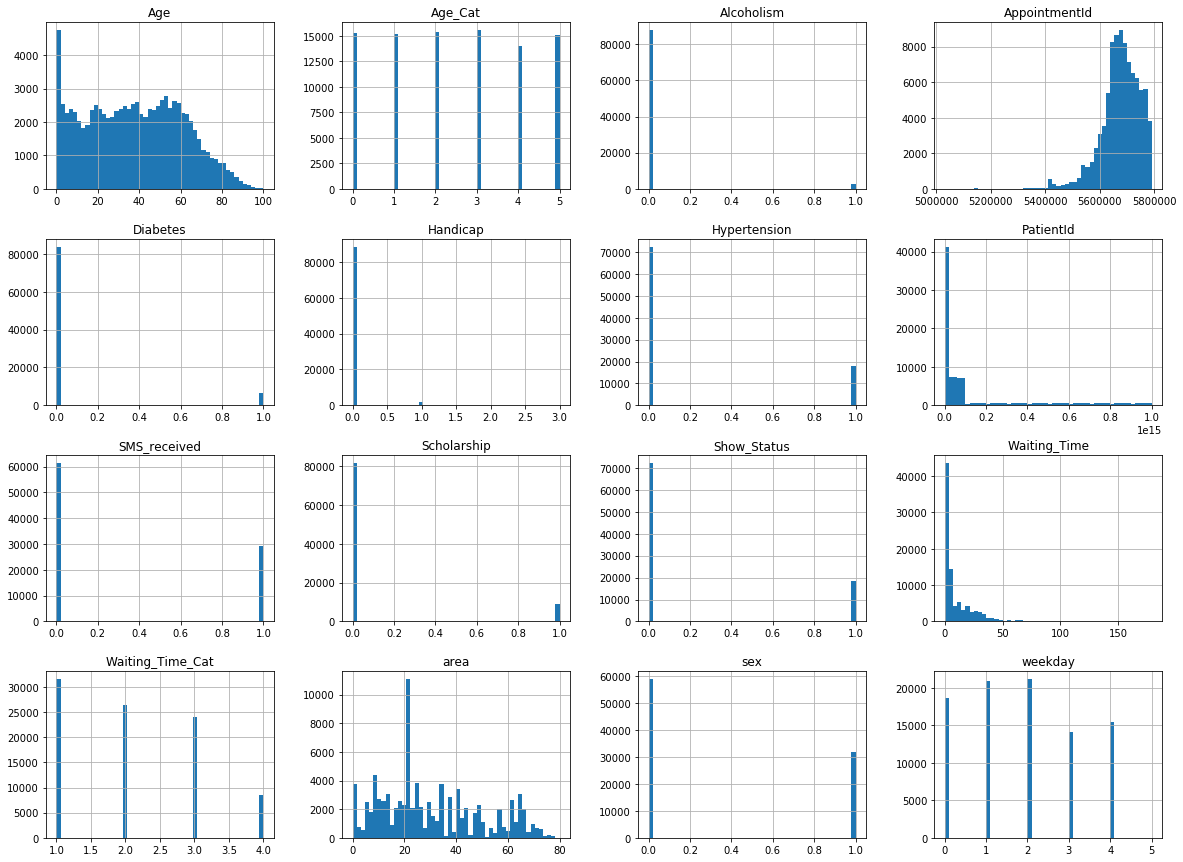

In [145]:
# Make plots here!

%matplotlib inline
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
plt.show()

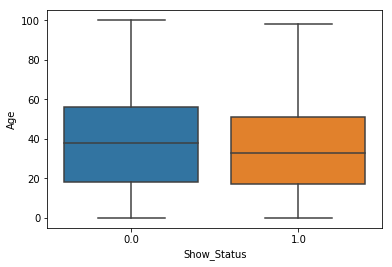

In [146]:
import seaborn as sb
age_hist = sb.boxplot(x="Show_Status", y="Age", data=train_set)

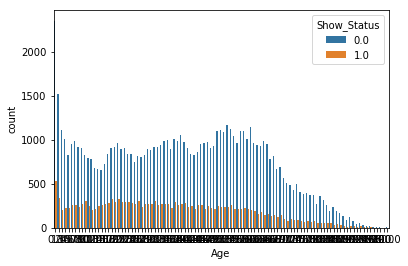

In [147]:
sb.countplot(x="Age", hue = "Show_Status", data=train_set)

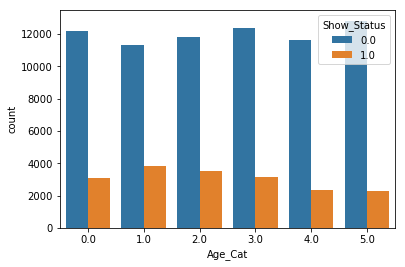

In [148]:
sb.countplot(x="Age_Cat", hue = "Show_Status", data=train_set)

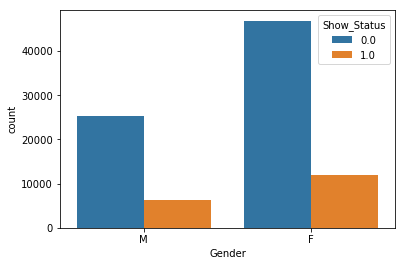

In [149]:
sb.countplot(x="Gender", hue = "Show_Status", data=train_set)

In [150]:
train_set.columns

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show', 'sex',
       'Show_Status', 'Waiting_Time', 'area', 'weekday', 'Waiting_Time_Cat',
       'Age_Cat'],
      dtype='object')

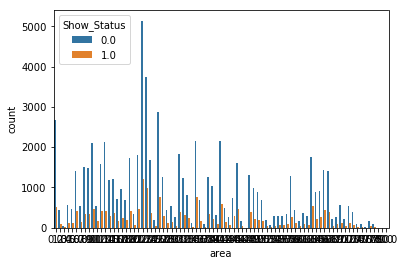

In [151]:
sb.countplot(x="area", hue = "Show_Status", data=train_set)


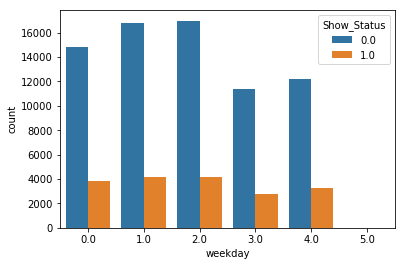

In [152]:
sb.countplot(x="weekday", hue = "Show_Status", data=train_set)

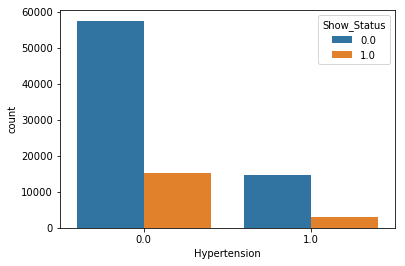

In [153]:
sb.countplot(x="Hypertension", hue = "Show_Status", data=train_set)



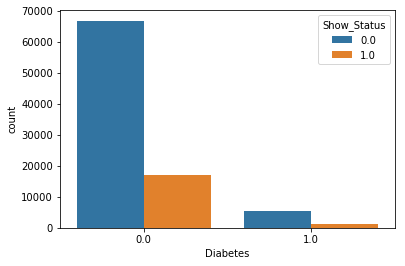

In [154]:
sb.countplot(x="Diabetes", hue = "Show_Status", data=train_set)




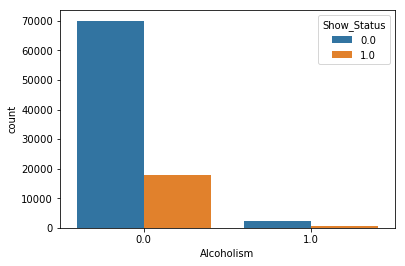

In [155]:
sb.countplot(x="Alcoholism", hue = "Show_Status", data=train_set)


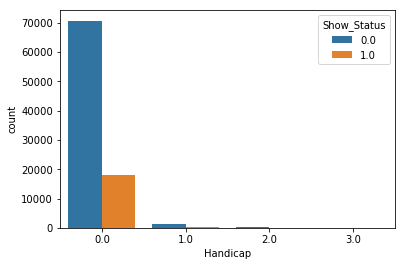

In [156]:
sb.countplot(x="Handicap", hue = "Show_Status", data=train_set)


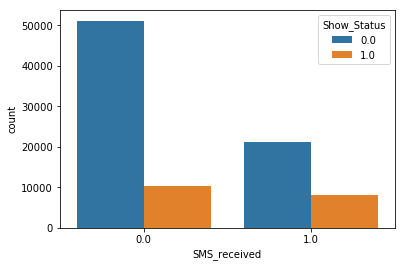

In [157]:
sb.countplot(x="SMS_received", hue = "Show_Status", data=train_set)

In [158]:
train_set.columns

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show', 'sex',
       'Show_Status', 'Waiting_Time', 'area', 'weekday', 'Waiting_Time_Cat',
       'Age_Cat'],
      dtype='object')

In [159]:
X = train_set[['Gender', 'Age', 'Scholarship', 'Hypertension','Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'sex',
        'Waiting_Time', 'area', 'weekday', 'Waiting_Time_Cat','Age_Cat','Show_Status']]
corr_matrix = X.corr()
corr_matrix["Show_Status"].sort_values(ascending=False)

Show_Status         1.000000
Waiting_Time_Cat    0.274913
Waiting_Time        0.185827
SMS_received        0.125523
Scholarship         0.030720
area                0.018800
weekday             0.002350
Alcoholism         -0.000775
sex                -0.003091
Handicap           -0.005445
Diabetes           -0.013974
Hypertension       -0.036751
Age                -0.061427
Age_Cat            -0.063170
Name: Show_Status, dtype: float64

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [160]:

cat_attributes1 = ['Gender','Neighbourhood']
cat_attributes2=['Handicap','weekday','Waiting_Time_Cat','Age_Cat']
not_used_attributes=['PatientId', 'AppointmentId', 'ScheduledDay','AppointmentDay','No_Show', 'sex','Show_Status', 'area' ]
num_attributes=['Age', 'Waiting_Time']
#binary_attributes = [x for x in list(train_set) if ((x not in cat_attributes) & (x not in not_used_attributes)& (x not in num_attributes)) ]
binary_attributes = [x for x in list(train_set) if (x not in (cat_attributes1+cat_attributes2+not_used_attributes+num_attributes)) ]

clean_train_set = train_set.drop(not_used_attributes, axis=1)
train_set_labels = train_set['Show_Status'].copy()


In [162]:
clean_train_set

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Waiting_Time,weekday,Waiting_Time_Cat,Age_Cat
16841,M,76.0,SANTA MARTHA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0
47450,F,66.0,MARUÍPE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0
9714,F,1.0,RESISTÊNCIA,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,3.0,0.0
55107,F,0.0,DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,3.0,0.0
109944,M,32.0,JARDIM CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,2.0
24421,F,61.0,ITARARÉ,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,4.0
109407,F,74.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,5.0
90344,F,35.0,SANTOS REIS,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
78655,F,1.0,BONFIM,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0
100976,F,14.0,SANTA MARTHA,0.0,0.0,0.0,0.0,0.0,1.0,21.0,3.0,3.0,1.0


In [163]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MultiLabelBinarizer

# create pipeline here!

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names].values

    
class MultiLabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        return self
    def transform(self, X, y = 0):
        encoder = MultiLabelBinarizer();
        result = encoder.fit_transform(X)
        return result;        

    
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attributes)),('std_scaler', StandardScaler())])

cat_pipeline1 = Pipeline([('selector', DataFrameSelector(cat_attributes1)),('label_binarizer', MultiLabelBinarizer_new())])
cat_pipeline2 = Pipeline([('selector', DataFrameSelector(cat_attributes2)),('label_binarizer', MultiLabelBinarizer_new())])

binary_pipeline = Pipeline([('selector', DataFrameSelector(binary_attributes))])


full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline),('cat_pipeline1', cat_pipeline1),('cat_pipeline2', cat_pipeline2),('binary_pipeline', binary_pipeline)])


# show the first 5 rows of the transformed training set

In [164]:
transform_train_set = full_pipeline.fit_transform(clean_train_set)

In [165]:
transform_train_set.shape

(90501, 96)

In [166]:
transform_train_set[0:2]

array([[ 1.68155617, -0.66744445,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 